In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

In [3]:
import matplotlib.pyplot as plt

In [4]:
sys.path.append("/mnt/d/Rutgers/control_transition/")

In [5]:
from plot_helper import *

In [6]:
from plot_utils import *

In [7]:
from data_collapse import *

In [207]:
# nshell=2
# L=11
# mu=1.1
# # zz=load_torch_pt(f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es50_seed0_SE.pt')
# zz=load_torch_pt(f'class_A_2D_L11_nshell2_mu1.20_es50_seed0_SE.pt')

# Generate

In [157]:
L_list=range(11,25,2)
params_list=[
({'es':'50','sigma':0},{'L':L_list,'nshell':[2,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2)) }),
({'es':'50','sigma':0},{'L':L_list,'nshell':[3,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.3,1.8,11)]),2)) }),
({'es':'50','sigma':0},{'L':L_list,'nshell':[4,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.6,2.1,11)]),2)) }),
({'es':'50','sigma':0},{'L':L_list,'nshell':[5,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.6,2.1,11)]),2)) }),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='{L} {mu:.2f} {nshell} {sigma:.3f}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )



generate_params: 100%|██████████| 112/112 [00:00<00:00, 45929.02it/s]


# Load

In [41]:
np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2))

array([1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.7 , 1.8 , 1.9 , 2.  , 2.1 ])

In [46]:
np.linspace(1.1,2.1,21)

array([1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ])

In [108]:
L_list=range(11,21,2)


In [158]:
L_list=range(11,25,2)
params_list=[
({'es':'50','sigma':0},{'L':L_list,'nshell':[2,3,4,5],'mu':np.linspace(1.1,2.1,21)}),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
data_0_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_0_dict,
        data_dict_file=None, 
    )


df_0=convert_pd(data_0_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params:   0%|          | 0/588 [00:00<?, ?it/s]

generate_params: 100%|██████████| 588/588 [00:12<00:00, 46.14it/s]


In [159]:
def plot_raw(nshell,df,metrics='Chern',ax=None,save=False,path='../Rp_SPTD/Fig/'):
    if ax is None:
        fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
    metrics_label = {'Chern':'$\mathcal{C}$','TMI':'$I^{(3)}$','EE':'$S_1/2$'}
    metrics_text = {'Chern':'C','TMI':'TMI','EE':'EE'}
    L_list=(df['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(0,level='seed0').xs(0,level='sigma').index.get_level_values('L').unique())
    color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
    for L in L_list:
        data=(df['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
        mu_list_1 = data.index
        data_mean = data.apply(np.mean)
        data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
        ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list),lw=1)
    ax.legend(frameon=False)
    ax.set_xlabel('$\mu$')
    ax.set_ylabel(metrics_label[metrics])
    
    if save:
        fig.savefig(path+f'{metrics_text[metrics]}_mu_nshell{nshell}.pdf',)

In [160]:
def plot_datacollapse(dc,nshell,metrics='Chern',ax=None,save=False,path='../Rp_SPTD/Fig/'):
    if ax is None:
        fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
    metrics_label = {'Chern':'$\mathcal{C}$','TMI':'$I^{(3)}$'}
    metrics_text = {'Chern':'C','TMI':'TMI'}
    dc.plot_data_collapse(ax=ax,s=10)
    ax.grid(False)
    ax.legend().remove()
    ax.set_xlabel(r'$(\mu-\mu_c)L^{1/\nu}$')
    ax.set_ylabel(metrics_label[metrics])
    ax.set_title(fr'$\mu_c={dc.p_c:.3f}\pm{dc.res.params["p_c"].stderr:.3f}, \nu={dc.nu:.3f}\pm{dc.res.params["nu"].stderr:.3f}$')
    if save:
        fig.savefig(path+f'{metrics_text[metrics]}_mu_nshell{nshell}_FSS.pdf',)

# Data

In [183]:
int(2/2*11)//2*2+1

11

11
17
21


Text(0.5, 0, '$\\mu$')

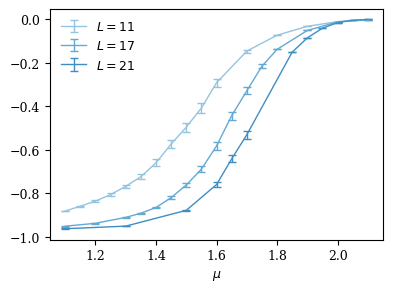

In [187]:
fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
metrics='Chern'
metrics_label = {'Chern':'$\mathcal{C}$','TMI':'$I^{(3)}$','EE':'$S_1/2$'}
metrics_text = {'Chern':'C','TMI':'TMI','EE':'EE'}
L_list=(df_0['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(0,level='seed0').xs(0,level='sigma').index.get_level_values('L').unique())
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
nshell_list=[2,3,4]
L_list=[11,17,21]
for nshell,L in zip(nshell_list,L_list):
    print(L)
    data=(df_0['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list),lw=1)
ax.legend(frameon=False)
ax.set_xlabel('$\mu$')
# ax.set_xlim(1.2,1.4)
# ax.set_ylim(-0.9,-0.6)
# ax.set_ylabel(metrics_label[metrics])

## nshell 2

In [161]:
df_0['observations'].xs('Chern',level='Metrics').xs(2,level='nshell').xs(0,level='seed0').xs(0,level='sigma').xs(1.4,level='mu')
# .apply(np.mean)

L
11    [-0.719481441899158, -0.7244248668750279, -0.7...
13    [-0.7297429606948017, -0.4843418020577623, -0....
15    [-0.7272991326420594, -0.4815004529376559, -0....
17    [-0.7160753666482607, -0.7147481310961038, -0....
19    [-0.6991169349250386, -0.7036450923674367, -0....
21    [-0.6812053980960319, -0.6875471834846939, -0....
Name: observations, dtype: object

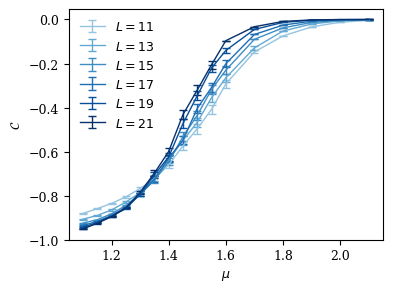

In [170]:
fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
plot_raw(nshell=2,df=df_0,save=False,ax=ax)
# ax.set_xlim(1.2,1.4)
# ax.set_ylim(-0.9,-0.6)

(-0.9, -0.6)

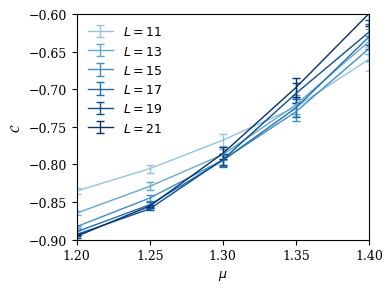

In [169]:
fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
plot_raw(nshell=2,df=df_0,save=False,ax=ax)
ax.set_xlim(1.2,1.4)
ax.set_ylim(-0.9,-0.6)

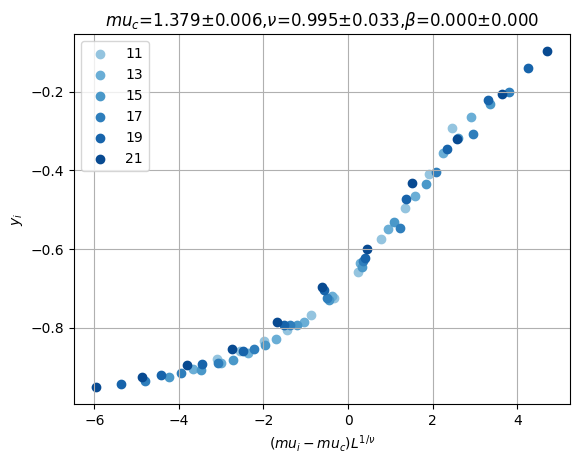

In [256]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':2},Lmin=11,Lmax=21,p_range=[1.1,1.6],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.39,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()


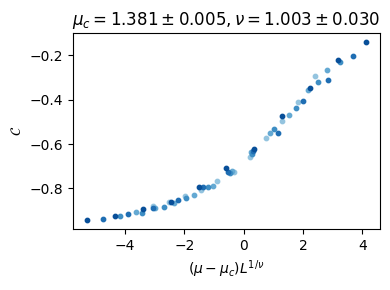

In [58]:
plot_datacollapse(dc,nshell=2,save=True,metrics='Chern')

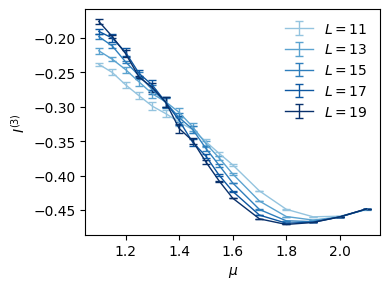

In [59]:
plot_raw(nshell=2,df=df_0,save=True,metrics='TMI')

(-0.35, -0.25)

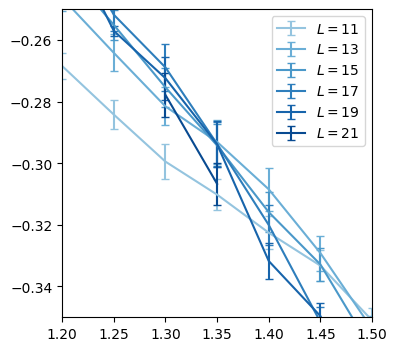

In [155]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
ax.set_xlim(1.2,1.5)
ax.set_ylim(-.35,-.25)

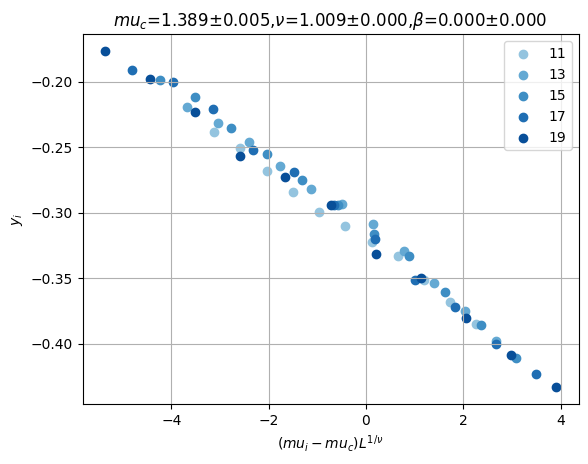

In [60]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':2},Lmin=11,Lmax=19,p_range=[1.1,1.6],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.39,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

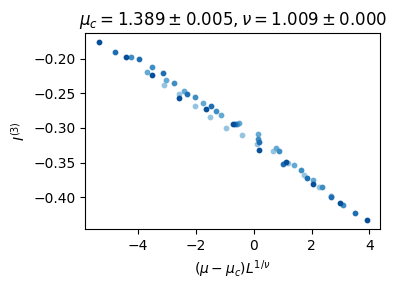

In [61]:
plot_datacollapse(dc,nshell=2,save=True,metrics='TMI')

## nshell 3

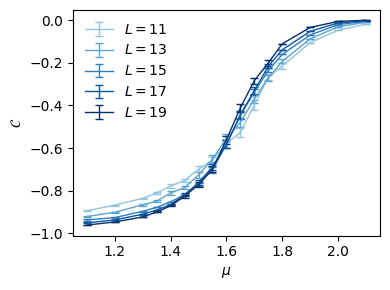

In [62]:
plot_raw(nshell=3,df=df_0,save=True)

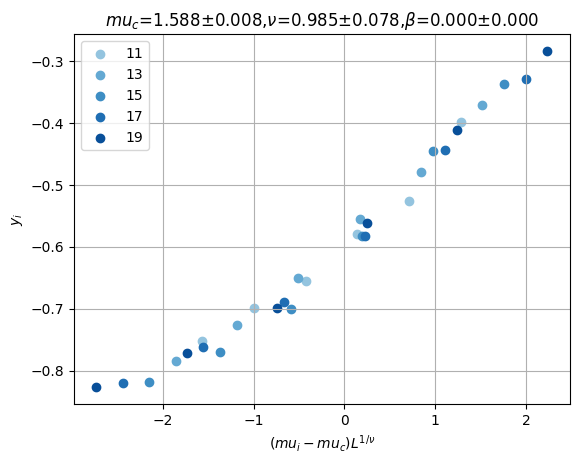

In [78]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':3},Lmin=11,Lmax=19,p_range=[1.45,1.7],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.59,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

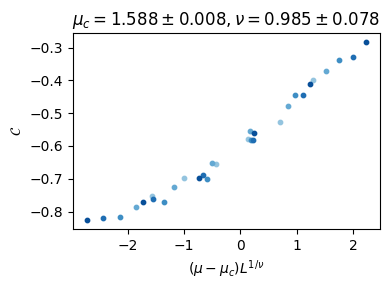

In [64]:
plot_datacollapse(dc,nshell=3,save=True,metrics='Chern')

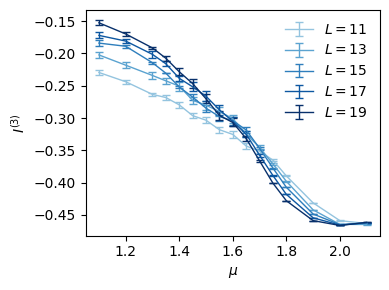

In [65]:
plot_raw(nshell=3,df=df_0,save=True,metrics='TMI')

(-0.35, -0.25)

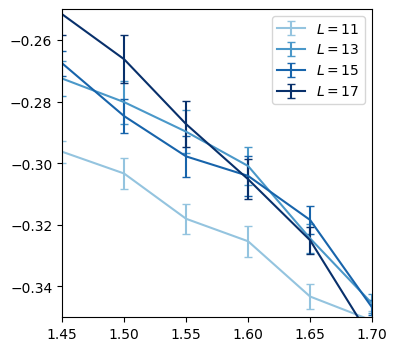

In [119]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=3
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
ax.set_xlim(1.45,1.7)
ax.set_ylim(-.35,-.25)

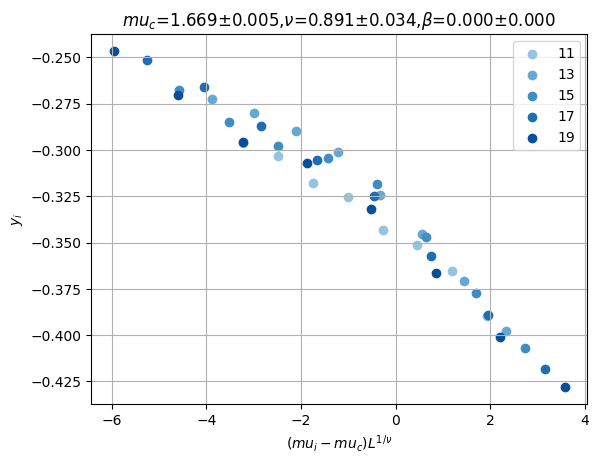

In [79]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':3},Lmin=11,Lmax=19,p_range=[1.45,1.8],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.59,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

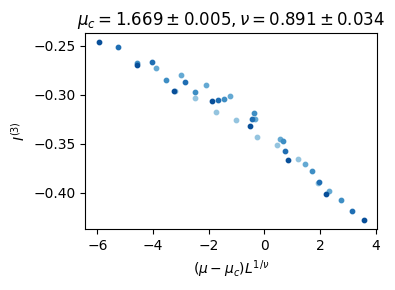

In [80]:
plot_datacollapse(dc,nshell=3,save=True,metrics='TMI')

## nshell = 4

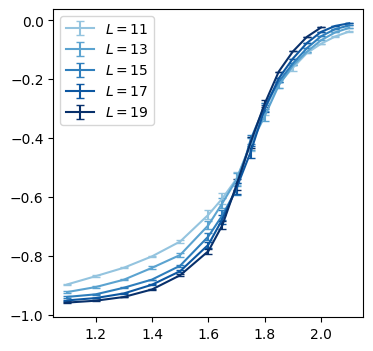

In [81]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=4
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()

# ax.set_xlim([1.6,2.1])
# ax.set_ylim([-0.8,0])

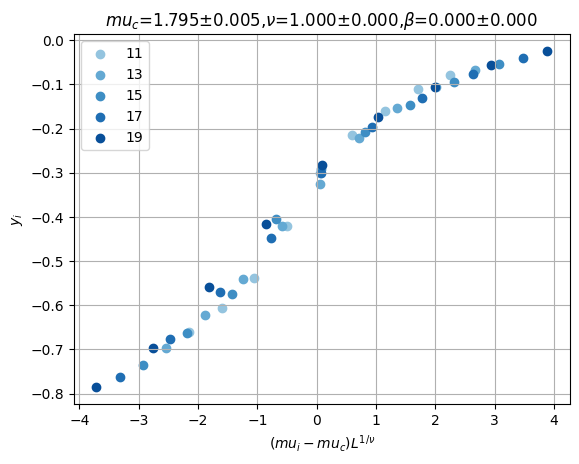

In [82]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.76,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=False)
dc.plot_data_collapse()

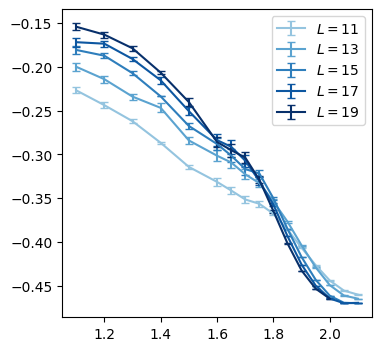

In [83]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=4
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


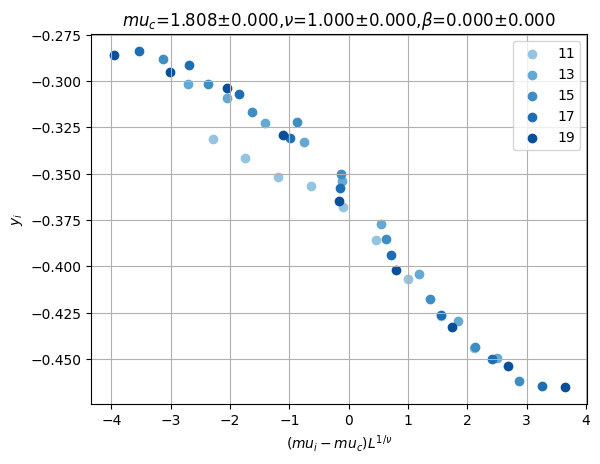

In [84]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=False)
dc.plot_data_collapse()

In [250]:
dc.res

## nshell =5

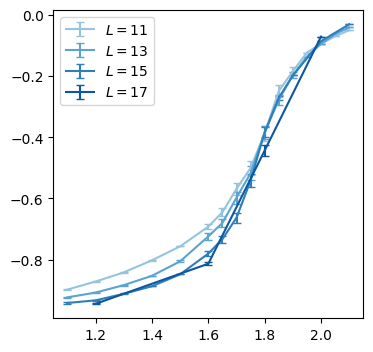

In [85]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=5
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


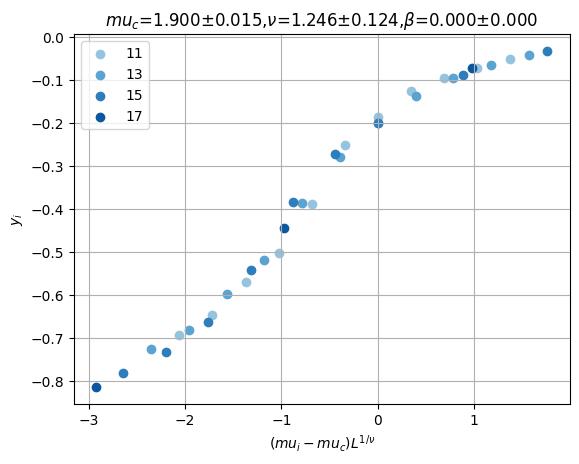

In [86]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':5},Lmin=11,Lmax=17,p_range=[1.6,2.1],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

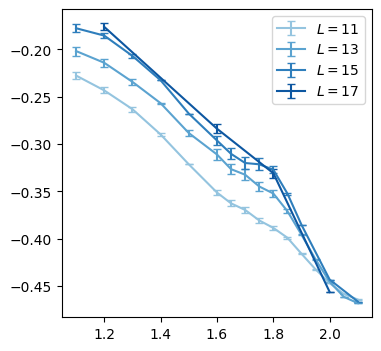

In [88]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=5
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(0,level='sigma'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


In [ ]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=False)
dc.plot_data_collapse()

In [ ]:
You can check what happened for "19 1.30 2", and seed = 4

[hp636@amarel2 GTN]$ cat 25.err
100%|██████████| 19/19 [03:48<00:00, 12.04s/it]
100%|██████████| 19/19 [03:49<00:00, 12.06s/it]
100%|██████████| 19/19 [03:49<00:00, 12.10s/it]
100%|██████████| 19/19 [03:49<00:00, 12.07s/it]

In [204]:
np.round(np.unique(np.hstack([np.linspace(0,0.1,21)[1:], np.linspace(0,1,11)[2:]])),3)

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  , 0.8  ,
       0.9  , 1.   ])

# Load sigma_list

## Generate

In [257]:
L_list=range(11,19,2)
params_list=[
# ({'es':'250','sigma':0},{'L':L_list,'nshell':[2,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2)) }),
({'es':'250','nshell':2,'mu':1},{'L':L_list,'sigma':np.linspace(0,1,21)}),
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='{L} {mu:.2f} {nshell} {sigma:.3f}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )



generate_params: 100%|██████████| 84/84 [00:00<00:00, 19648.74it/s]


In [258]:
np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  ,
       0.8  , 0.9  , 1.   ])

In [259]:
13792.6451/3600*4

15.325161222222222

In [110]:
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.linspace(0,1,21)}),
({'es':'300','nshell':2,'mu':1},{'L':range(11,19,2),'sigma':np.linspace(0,1,21)}),
({'es':'50','nshell':2,'mu':1},{'L':range(19,27,2),'sigma':np.linspace(0,1,21)}),
]
data_1_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_1_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_1_dict,
        data_dict_file=None, 
    )


df_1=convert_pd(data_1_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 84/84 [00:00<00:00, 124.15it/s]


In [111]:
df_1

observations
Metrics L  nshell mu sigma seed0                                                   
TMI     11 2      1  0.00  0      [-0.21545165276643916, -0.21463890550915424, -...
Chern   11 2      1  0.00  0      [-0.9130166037866685, -0.9150744595281359, -0....
TMI     11 2      1  0.05  0      [-0.24038153812579596, -0.23291855796357994, -...
Chern   11 2      1  0.05  0      [-0.9077319765339767, -0.9206407879746811, -0....
TMI     11 2      1  0.10  0      [-0.2755194383408123, -0.2869531152613844, -0....
...                                                                             ...
        25 2      1  0.35  0      [-0.38645630207550613, -0.36709452100241324, -...
Chern   25 2      1  0.35  0      [-0.509671347398173, -0.40122486497096777, -0....
OP      25 2      1  0.40  0      [0.4572854246804634, 0.42037807908158664, 0.41...
TMI     25 2      1  0.40  0      [-0.3162035432737813, -0.3747570525565956, -0....
Chern   25 2      1  0.40  0      [-0.4053419016998659, -0.4244457955453592, -0....

[253 rows x 1 columns]

In [ ]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:]:
    # data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-1,-0.45])

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\overline{\mathcal{C}(\Gamma)}$')

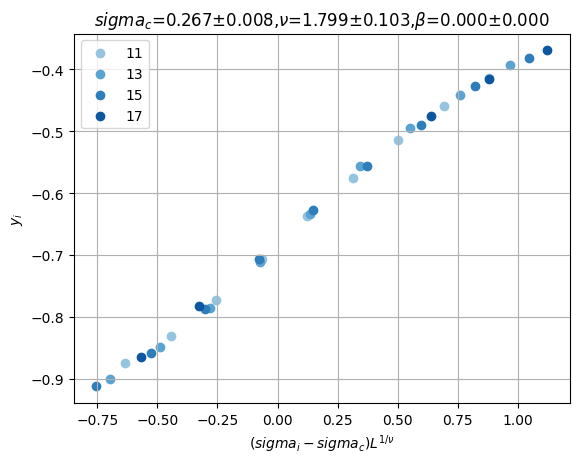

In [330]:
dc=DataCollapse(df=df_1,params={'Metrics':'Chern','seed0':0,'nshell':2,'mu':1},Lmin=11,Lmax=17,p_range=[0.1,0.5],p_='sigma',L_='L')
dc.datacollapse(nu=1.,p_c=.301,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=True)
dc.plot_data_collapse()

In [301]:
np.linspace(0.25,1,21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [120]:
np.linspace(0,1,11)[2:]

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Text(0, 0.5, '$\\overline{\\mathcal{C}(\\Gamma)}$')

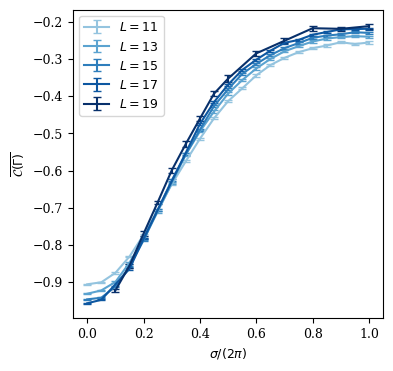

In [101]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:]:
    # data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\overline{\mathcal{C}(\Gamma)}$')

Text(0, 0.5, '$\\overline{I^{(3)}}$')

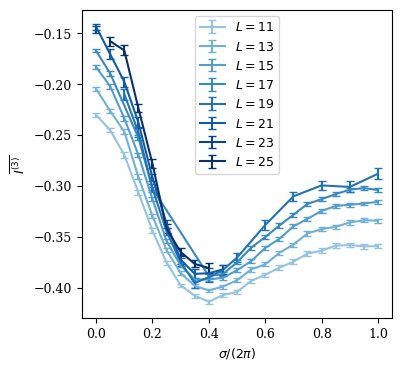

In [128]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:]:
    # data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    data=(df_1['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\overline{I^{(3)}}$')

Text(0, 0.5, '$\\overline{n_d(\\Gamma)}$')

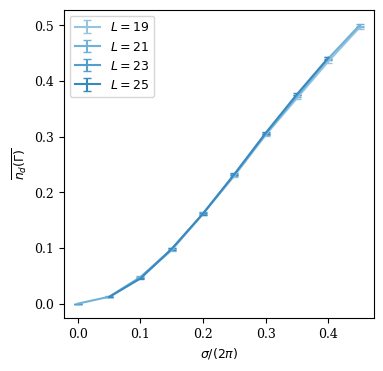

In [125]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in range(11,27,2):
    # data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    try:
        data=(df_1['observations'].xs('OP',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
        sigma_list = data.index 
        data_mean = data.apply(np.mean)
        data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
        ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
    except:
        pass
ax.legend()
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\overline{n_d(\Gamma)}$')

## Dynamics of n_d

In [8]:
L_list=range(11,13,2)
params_list=[
({'es':'50','nshell':2,'mu':1,'tf':10},{'L':L_list,'sigma':np.linspace(0,1,21),}),
]
data_d_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_d_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_tf{tf}_SE.pt',
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_tf{tf}_T.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_d_dict,
        data_dict_file=None, 
    )
df_d=convert_pd(data_d_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 21/21 [00:00<00:00, 226.58it/s]


In [ ]:
1- n_- + n_+

Float64Index([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45], dtype='float64', name='sigma')

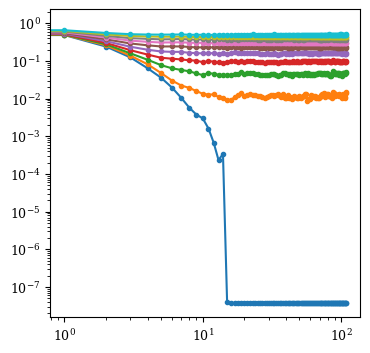

In [37]:
fig,ax=plt.subplots(figsize=(4,4))
sigma_list = df_d['observations'].index.get_level_values('sigma').unique()
for sigma in sigma_list:
    ax.plot(df_d['observations'].xs(sigma,level='sigma').iloc[0].mean(axis=0),'.-',label=f'$\sigma={sigma}$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.legend()

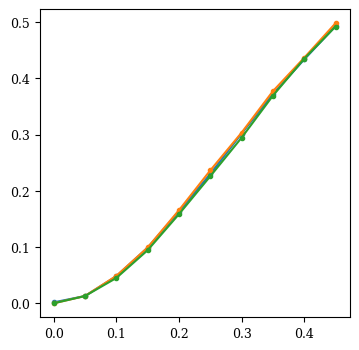

In [40]:
fig,ax=plt.subplots(figsize=(4,4))

sigma_list = df_d['observations'].index.get_level_values('sigma').unique()
t=10
for t in [11,21,31]:
    x=sigma_list
    y=[df_d['observations'].xs(sigma,level='sigma').iloc[0].mean(axis=0)[t] for sigma in sigma_list]
    ax.plot(x,y,'.-',label=f'$t={t}$')

In [248]:
L_list=range(11,13,2)
params_list=[
({'es':'50','nshell':2,'mu':1,'tf':4},{'L':L_list,'sigma':np.linspace(0,1,21),}),
]
data_d4_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_d4_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_tf{tf}_SE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_d4_dict,
        data_dict_file=None, 
    )
df_d4=convert_pd(data_d4_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params:   0%|          | 0/21 [00:00<?, ?it/s]

generate_params: 100%|██████████| 21/21 [00:00<00:00, 334.04it/s]



Text(0, 0.5, '$\\overline{n_d(\\Gamma)}$')

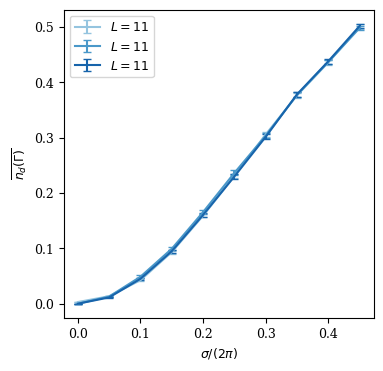

In [251]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,4)))
# for L in L_list[:1]:
for L in L_list[:1]:
    data=(df_1['observations'].xs('OP',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))

for L in L_list[:1]:
    data=(df_d['observations'].xs('OP',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))

for L in L_list[:1]:
    data=(df_d4['observations'].xs('OP',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))

ax.legend()



ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\overline{n_d(\Gamma)}$')



Text(0, 0.5, '$\\overline{n_d(\\Gamma)}$')

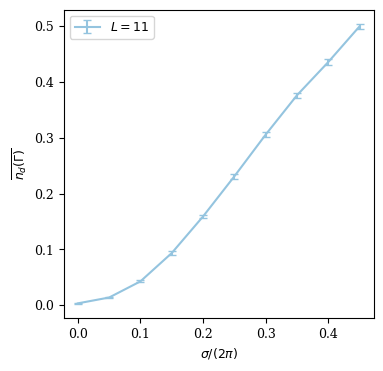

In [234]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:1]:
    data=(df_1['observations'].xs('OP',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\overline{n_d(\Gamma)}$')

# Load chern average

In [252]:
# L_list=
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.linspace(0,1,21)}),
({'es':'300','nshell':2,'mu':1},{'L':range(11,19,2),'sigma':np.linspace(0,1,21)}),
({'es':'50','nshell':2,'mu':1},{'L':range(19,21,2),'sigma':np.linspace(0,1,21)}),
]
data_3_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_3_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_Chern_ave.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_3_dict,
        data_dict_file=None, 
    )


df_3=convert_pd(data_3_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 21/21 [00:00<00:00, 66.99it/s]


In [253]:
df_3.xs('Chern',level='Metrics')

observations
L  nshell mu  sigma seed0                       
11 2      1.0 0.00  0        -0.9039867637538795
              0.05  0         -0.859660533541177
              0.10  0        -0.7360594831004117
              0.15  0        -0.5690072601043632
              0.20  0        -0.4082659673865932
...                                          ...
19 2      1.0 0.25  0        -0.2852303561300818
              0.30  0       -0.17817652477276216
              0.35  0        -0.1086369004251311
              0.40  0       -0.06258969120643085
              0.45  0      -0.033893140427024744

[93 rows x 1 columns]

Text(0, 0.5, '$\\mathcal{C}(\\overline{\\Gamma})$')

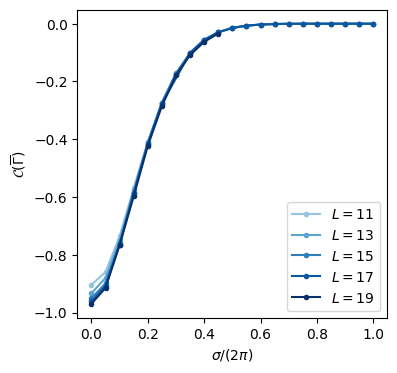

In [351]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
L_list=list(range(11,19,2))+[19,]
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_3['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    ax.errorbar(sigma_list,data,label=f'$L={L}$',capsize=3,color=next(color_list),fmt='.-')
ax.legend()
# ax.set_xlim([0.2,0.45])
# ax.set_ylim([-0.8,-0.45])
# ax.set_yscale('log')

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\mathcal{C}(\overline{\Gamma})$')

## Load Chern with purify

In [188]:
# L_list=
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.linspace(0,1,21)}),
({'es':'200','nshell':2,'mu':1,'seed':0},{'L':range(11,19,2),'sigma':np.linspace(0,1,21)}),
({'es':'400','nshell':2,'mu':1,'seed':50},{'L':range(19,21,2),'sigma':np.linspace(0,1,21)}),
({'es':'50','nshell':2,'mu':1,'seed':0},{'L':[21,],'sigma':np.linspace(0,1,21)}),
({'es':'50','nshell':2,'mu':1,'seed':0},{'L':[23,25],'sigma':np.linspace(0,1,21)}),
# ({'es':'600','nshell':2,'mu':1},{'L':range(11,19,2),'sigma':np.linspace(0,1,21)}),
# ({'es':'50','nshell':2,'mu':1},{'L':range(19,21,2),'sigma':np.linspace(0,1,21)}),
]
data_4_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_4_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed{seed}_Chern_ave_purify.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_4_dict,
        data_dict_file=None, 
    )


df_4=convert_pd(data_4_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 42/42 [00:00<00:00, 318.25it/s]


Text(0, 0.5, '$\\mathcal{C}(\\rm Purify(\\overline{\\Gamma}))$')

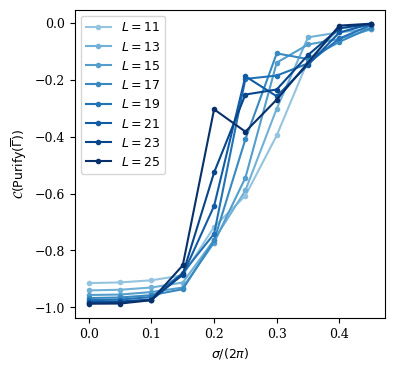

In [189]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
L_list=list(range(11,27,2))
# L_list.remove(19)
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_4['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(1,level='mu'))
    sigma_list = data.index.get_level_values('sigma')
    ax.errorbar(sigma_list,data.values,label=f'$L={L}$',capsize=3,color=next(color_list),fmt='.-')
ax.legend()
# ax.set_xlim([0.2,0.45])
# ax.set_ylim([-0.8,-0.45])
# ax.set_yscale('log')

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\mathcal{C}(\rm Purify(\overline{\Gamma}))$')

In [ ]:
df_4['observations'].xs('eigvals_t',level='Metrics').xs(nshell,level='nshell').xs(11,level='L').xs(0,level='seed0').xs(1,level='mu').loc[0]

In [144]:
15**2*4*2

1800

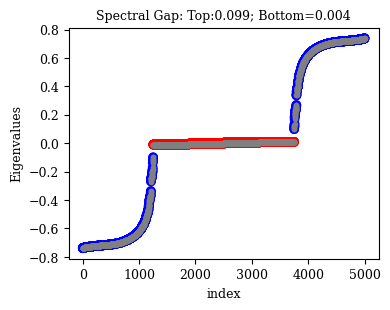

In [147]:
sigma=0.3
L=25
plot_eigvals_(
    eigvals=df_4['observations'].xs('eigvals',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu').loc[sigma],
    eigvals_t=df_4['observations'].xs('eigvals_t',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu').loc[sigma],
    eigvals_b=df_4['observations'].xs('eigvals_b',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu').loc[sigma],
    )

In [ ]:
plt.plot(df_4.index.get_level_values('sigma').unique(),[np.abs(df_4['observations'].xs('eigvals_t',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(50,level='seed0').xs(1,level='mu').loc[sigma]).min() for sigma in df_4.index.get_level_values('sigma').unique()],'.-')

In [ ]:
df_4['observations'].xs('eigvals_t',level='Metrics').xs(nshell,level='nshell').xs(11,level='L').xs(0,level='seed0').xs(1,level='mu').loc[0],

Text(0, 0.5, '$\\mathcal{C}(\\rm Purify(\\overline{\\Gamma}))$')

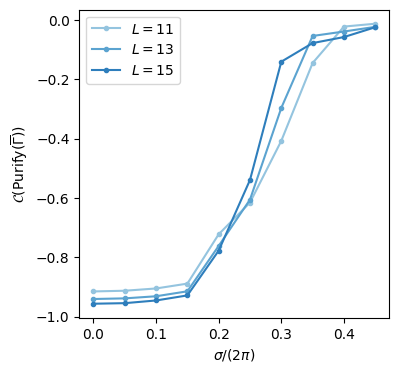

In [ ]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
L_list=list(range(11,19,2))+[19,]
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-2]:
    data=(df_4['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    ax.errorbar(sigma_list,data,label=f'$L={L}$',capsize=3,color=next(color_list),fmt='.-')
ax.legend()
# ax.set_xlim([0.2,0.45])
# ax.set_ylim([-0.8,-0.45])
# ax.set_yscale('log')

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\mathcal{C}(\rm Purify(\overline{\Gamma}))$')

## C(r)

In [87]:
L_list=range(11,13,2)
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.linspace(0,1,21)}),
({'es':'20','mu':1},{'L':L_list,'sigma':np.linspace(0,1,21),'nshell':[2,]}),
]
data_4_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_4_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        # fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_Chern_ave.pt',
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_Chern_ave_purify.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_4_dict,
        data_dict_file=None, 
    )


df_4=convert_pd(data_4_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 21/21 [00:00<00:00, 33877.07it/s]


In [48]:
df_4['observations'].xs('Cr_i',level='Metrics')
# .xs(0.00,level='sigma').iloc[0]

L   nshell  mu   sigma  seed0
11  2       1.0  0.00   0        [0.04003103040593469, 0.0005457164624194179, 8...
                 0.05   0        [0.03968615404178183, 0.00056830467240904, 9.4...
                 0.10   0        [0.03868980610141749, 0.0006183453639771613, 0...
                 0.15   0        [0.0369749315508138, 0.0007264231518965747, 0....
                 0.20   0        [0.03489516481647666, 0.0008497954703392463, 0...
                 0.25   0        [0.032820513551723045, 0.0009954192777356064, ...
                 0.30   0        [0.03097580729595485, 0.0011362530673559195, 0...
                 0.35   0        [0.029239770420440875, 0.0012437648494982585, ...
                 0.40   0        [0.02802618054598976, 0.0013365924008781893, 0...
                 0.45   0        [0.026718038222341096, 0.0014109244164573892, ...
Name: observations, dtype: object

In [132]:
sigma

0.45

In [191]:
df_4['observations'].xs('Cr_j',level='Metrics').xs(nshell,level='nshell').xs(sigma,level='sigma').loc[19]

mu   seed0
1.0  0        [0.02764813635573155, 0.001483257958060919, 0....
Name: observations, dtype: object

In [192]:
df_4['observations'].xs('Cr_j',level='Metrics').xs(nshell,level='nshell').xs(sigma,level='sigma').xs(1,level='mu')

L   seed0
19  0        [0.02764813635573155, 0.001483257958060919, 0....
Name: observations, dtype: object

Text(0, 0.5, '$C(r)$')

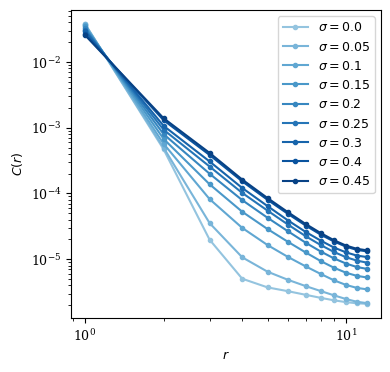

In [190]:
fig,ax=plt.subplots(figsize=(4,4))
sigma_list=df_4.index.get_level_values('sigma').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(sigma_list))))
nshell=2
L=25
for sigma in sigma_list:
    try:
        data = df_4['observations'].xs('Cr_j',level='Metrics').xs(nshell,level='nshell').xs(sigma,level='sigma').xs(1,level='mu').xs(0,level='seed0').loc[L]
        x=np.arange(len(data))+1
        ax.plot(x,data,'.-',label=f'$\sigma={sigma}$',color=next(color_list))
    except:
        pass
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$r$')
ax.set_ylabel('$C(r)$')

In [43]:
(11,0.02),(40,0.4e-2)

((11, 0.02), (40, 0.004))

In [46]:
(np.log10(0.4e-2)-np.log10(0.02))/(np.log10(40)-np.log10(11))

-1.2466751612665126

Text(0, 0.5, '$C(r)$')

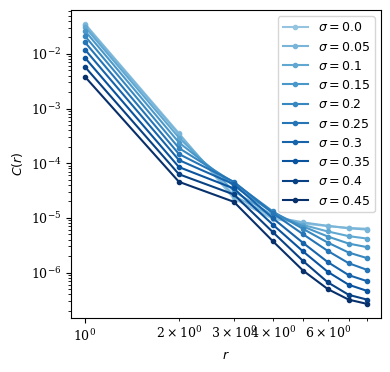

In [ ]:
fig,ax=plt.subplots(figsize=(4,4))
sigma_list=df_4.index.get_level_values('sigma').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(sigma_list))))
nshell=2
L=17
for sigma in sigma_list:
    # try:
    data = df_4['observations'].xs('Cr_j',level='Metrics').xs(nshell,level='nshell').xs(sigma,level='sigma').xs(1,level='mu').xs(0,level='seed0').loc[L]
    x=np.arange(len(data))+1
    ax.plot(x,data,'.-',label=f'$\sigma={sigma}$',color=next(color_list))
    # except:
    #     pass
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$r$')
ax.set_ylabel('$C(r)$')

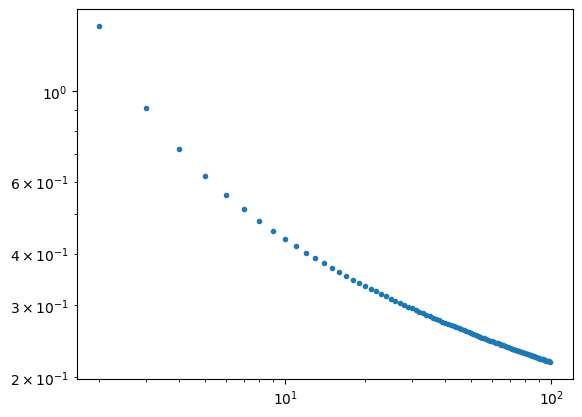

In [323]:
x=np.arange(100)
y=1/np.log(x)
plt.plot(x,y,'.')
plt.yscale('log')
plt.xscale('log')

# Load as a function of L

In [143]:
L_list=range(11,23,2)
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
({'es':'200','mu':1.38,'sigma':0},{'L':L_list,'nshell':[2]}),
({'es':'200','mu':1.58,'sigma':0},{'L':L_list,'nshell':[3]}),
]
data_2_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_2_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_2_dict,
        data_dict_file=None, 
    )


df_2=convert_pd(data_2_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params:   0%|          | 0/6 [00:00<?, ?it/s]

generate_params: 100%|██████████| 6/6 [00:00<00:00, 170.32it/s]


In [109]:
def plot_L_raw(nshell,df,metrics='Chern',normL=False,ax=None,save=False,path='../Rp_SPTD/Fig/'):
    if ax is None:
        fig,ax=plt.subplots(figsize=(4,3),tight_layout=True)
    metrics_label = {'Chern':'$\mathcal{C}$','TMI':'$I^{(3)}$','EE':'$S_{1/2}$'}
    metrics_text = {'Chern':'C','TMI':'TMI','EE':'EE'}
    mu_list=(df['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(0,level='seed0').xs(0,level='sigma').index.get_level_values('mu').unique())
    print(mu_list)
    color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
    for mu in mu_list:
        data=(df['observations'].xs(metrics,level='Metrics').xs(nshell,level='nshell').xs(mu,level='mu').xs(0,level='seed0').xs(0,level='sigma'))
        L_list_1 = data.index
        data_mean = data.apply(np.mean)
        data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
        if normL:
            data_mean = data_mean/L_list_1
            data_sem = data_sem/L_list_1
        ax.errorbar(L_list_1,data_mean,yerr=data_sem,label=f'$\mu={mu}$',capsize=3,color=next(color_list),lw=1)
    ax.legend(frameon=False)
    ax.set_xlabel('$\mu$')
    ax.set_ylabel(metrics_label[metrics])
    
    if save:
        fig.savefig(path+f'{metrics_text[metrics]}_mu_nshell{nshell}.pdf',)

In [146]:
df_2

observations
Metrics L  nshell mu   sigma seed0                                                   
EE      11 2      1.38 0.0   0      [14.688025162173636, 14.665475882671638, 14.66...
        13 2      1.38 0.0   0      [17.327897436513286, 17.323071288093143, 17.93...
        15 2      1.38 0.0   0      [19.985372092726315, 19.998669181147104, 19.98...
        17 2      1.38 0.0   0      [22.66302665510351, 22.667054089377398, 22.645...
        19 2      1.38 0.0   0      [25.931026397132495, 25.32782319767897, 25.319...
        11 3      1.58 0.0   0      [13.363190250986905, 13.871623889058807, 13.36...
        13 3      1.58 0.0   0      [15.794514827909731, 15.794537118244321, 15.79...
        15 3      1.58 0.0   0      [18.222287624164416, 18.22255332120862, 18.223...
        17 3      1.58 0.0   0      [20.652662003435296, 20.65281896930733, 20.654...
        19 3      1.58 0.0   0      [23.08668506695432, 23.676257844970216, 23.089...
        21 3      1.58 0.0   0      [25.52814113983767, 25.536154961043245, 26.099...

Float64Index([1.38], dtype='float64', name='mu')


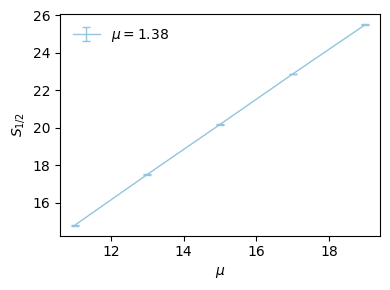

In [113]:
plot_L_raw(nshell=2,df=df_2,metrics='EE')

Float64Index([1.38], dtype='float64', name='mu')


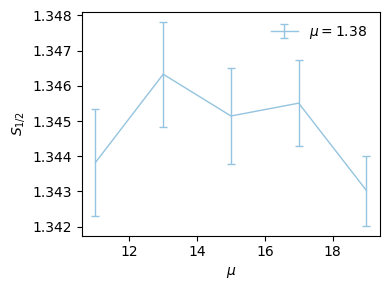

In [114]:
plot_L_raw(nshell=2,df=df_2,metrics='EE',normL=True)

Float64Index([1.58], dtype='float64', name='mu')


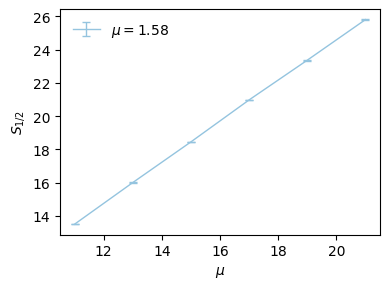

In [119]:
plot_L_raw(nshell=3,df=df_2,metrics='EE')

Float64Index([1.58], dtype='float64', name='mu')


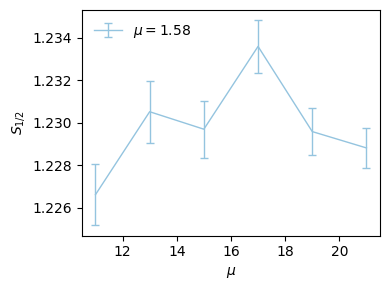

In [120]:
plot_L_raw(nshell=3,df=df_2,metrics='EE',normL=True)

# Rectangle , tuned by sigma

In [86]:
L_list=range(13,45,2)
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
({'es':'50','mu':1,'Lx':11},{'Ly':L_list,'nshell':[2],'sigma':np.linspace(0,1,21)}),
]
data_5_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_5_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_Lx{Lx}_Ly{Ly}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_5_dict,
        data_dict_file=None, 
    )


df_5=convert_pd(data_5_dict,names=['Metrics','Lx','Ly','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 336/336 [00:02<00:00, 126.55it/s]


In [87]:
df_5

,,,,,,,observations
Metrics,Lx,Ly,nshell,mu,sigma,seed0,
Chern_ave,11,13,2,1.0,0.00,0,-0.928739901330486
EE,11,13,2,1.0,0.00,0,"[18.46560888289757, 18.484332628267637, 18.484..."
Cr_j,11,13,2,1.0,0.00,0,"[0.035129162286269604, 0.000440471958982073, 5..."
Chern,11,13,2,1.0,0.00,0,"[-0.927237079594321, -0.9291663112114079, -0.9..."
eigvals,11,13,2,1.0,0.00,0,"[-1.0000000020784734, -1.0000000018079958, -1...."
...,...,...,...,...,...,...,...
Cr_i,11,41,2,1.0,0.45,0,"[0.02677173419132913, 0.001385236806908411, 0...."
cr_i,11,41,2,1.0,0.45,0,"[1.0742036306308322e-09, 1.0066941462509376e-1..."
eigvals_t,11,41,2,1.0,0.45,0,"[-0.5758553959810159, -0.5758521667373657, -0...."


In [88]:
df_5['observations'].xs('EE',level='Metrics').xs(nshell,level='nshell').xs(11,level='Lx').xs(0.2,level='sigma').xs(0,level='seed0').xs(1,level='mu')

Ly
13    [21.039294447311335, 21.829594898010285, 21.06...
15    [23.693558913680178, 24.0032090187999, 23.1578...
17    [25.930927569154836, 24.99234384665696, 24.665...
19    [26.294992787081167, 26.78354313830823, 26.809...
21    [29.788638785970157, 28.885991360657545, 30.06...
23    [29.984120931107725, 30.234187702176037, 30.76...
25    [31.67442162727028, 32.32856135405778, 32.6292...
27    [33.36269396299983, 33.29430386811666, 34.4022...
29    [35.19489572688758, 34.32142029272916, 35.2669...
31    [36.891602132207645, 37.11085070901107, 37.486...
33    [38.753709729323404, 39.93477020749802, 39.126...
35    [42.06860225435902, 41.22509931447129, 42.4817...
37    [43.860647165718575, 42.381581945966964, 43.06...
39    [45.211761150786245, 44.00681222135174, 44.048...
41    [45.935264215210125, 47.29106890475276, 47.898...
Name: observations, dtype: object

Text(0, 0.5, '$S_{L_y/2}$')

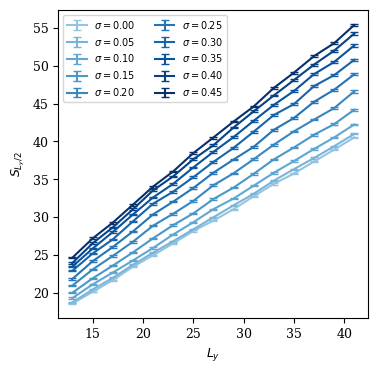

In [100]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
sigma_list = df_5.index.get_level_values('sigma').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(sigma_list))))
for sigma in sigma_list:
    data=df_5['observations'].xs('EE',level='Metrics').xs(nshell,level='nshell').xs(11,level='Lx').xs(sigma,level='sigma').xs(0,level='seed0').xs(1,level='mu')
    L_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(L_list,data_mean,yerr=data_sem,label=f'$\sigma={sigma:.2f}$',capsize=3,color=next(color_list))
ax.legend(ncols=2,fontsize=7)
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$L_y$')
ax.set_ylabel(r'$S_{L_y/2}$')

Text(0, 0.5, '$\\overline{\\mathcal{C}(\\Gamma)}$')

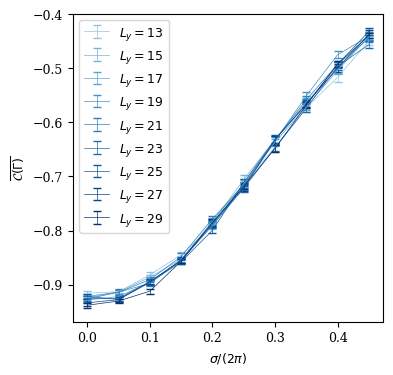

In [91]:
fig,ax=plt.subplots(figsize=(4,4))
L_list=range(13,31,2)
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
Lx=11
for Ly in L_list[:]:
    data=(df_5['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(Lx,level='Lx').xs(Ly,level='Ly').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(sigma_list,data_mean,yerr=data_sem,label=f'$L_y={Ly}$',capsize=3,color=next(color_list),lw=0.5)
ax.legend()
# ax.set_xlim([0.,0.35])
# ax.set_ylim([-1,-0.45])

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\overline{\mathcal{C}(\Gamma)}$')

In [92]:
df_5['observations'].xs('Chern_ave',level='Metrics').xs(nshell,level='nshell').xs(Lx,level='Lx')

Ly  mu   sigma  seed0
13  1.0  0.00   0           -0.928739901330486
         0.05   0          -0.9274137619867006
         0.10   0          -0.9186331769945297
         0.15   0          -0.9022909169591254
         0.20   0          -0.8659616811936821
                                 ...          
41  1.0  0.25   0          -0.4489171927201455
         0.30   0          -0.3205665829299588
         0.35   0         -0.12609176412871853
         0.40   0        -0.021306059317351626
         0.45   0        -0.005203338482202779
Name: observations, Length: 150, dtype: object

Text(0, 0.5, '$\\mathcal{C}(\\overline{\\Gamma})$')

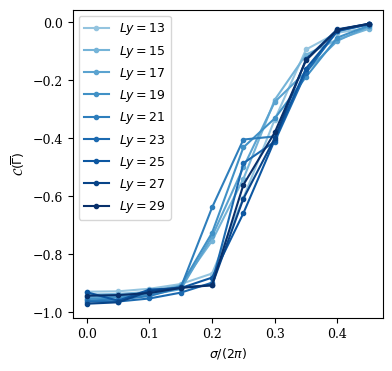

In [93]:
fig,ax=plt.subplots(figsize=(4,4))
L_list=range(13,31,2)
Lx=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for Ly in L_list:
    data=(df_5['observations'].xs('Chern_ave',level='Metrics').xs(nshell,level='nshell').xs(Lx,level='Lx').xs(Ly,level='Ly').xs(0,level='seed0').xs(1,level='mu'))
    sigma_list = data.index 
    ax.errorbar(sigma_list,data,label=f'$Ly={Ly}$',capsize=3,color=next(color_list),fmt='.-')
ax.legend()
# ax.set_xlim([0.2,0.45])
# ax.set_ylim([-0.8,-0.45])
# ax.set_yscale('log')

ax.set_xlabel('$\sigma/(2\pi)$')
ax.set_ylabel(r'$\mathcal{C}(\overline{\Gamma})$')

In [94]:
df_5['observations'].xs('Cr_j',level='Metrics').xs(nshell,level='nshell').xs(Lx,level='Lx').xs(Ly,level='Ly').xs(1,level='mu').xs(0,level='seed0')

sigma
0.00    [0.03789004174252171, 0.00048431892383172197, ...
0.05    [0.0374835338605894, 0.0005073702653312025, 6....
0.10    [0.03649551389677301, 0.0005820669190405566, 9...
0.15    [0.035068127429602476, 0.0006831380674920524, ...
0.20    [0.033139765823631914, 0.0008099204751610314, ...
0.25    [0.03150233375371811, 0.0009459101738003355, 0...
0.30    [0.029891413925685464, 0.0010634621451482832, ...
0.35    [0.02838718597652201, 0.0011934603217148827, 0...
0.40    [0.02702731638993452, 0.0013029469047571816, 0...
0.45    [0.026097609024293922, 0.0013944125083265636, ...
Name: observations, dtype: object

Text(0, 0.5, '$C(r)$')

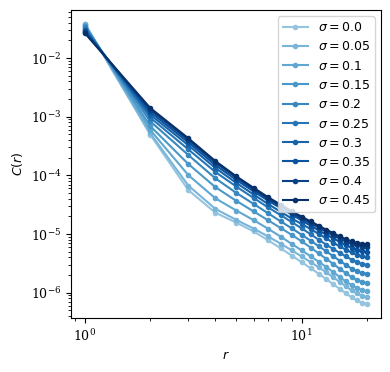

In [96]:
fig,ax=plt.subplots(figsize=(4,4))
sigma_list=df_5.index.get_level_values('sigma').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(sigma_list))))
nshell=2
Lx,Ly=11,41
for sigma in sigma_list:
    data = df_5['observations'].xs('Cr_j',level='Metrics').xs(nshell,level='nshell').xs(Lx,level='Lx').xs(Ly,level='Ly').xs(1,level='mu').xs(0,level='seed0')[sigma]
    x=np.arange(len(data))+1
    ax.plot(x,data,'.-',label=f'$\sigma={sigma}$',color=next(color_list))
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$r$')
ax.set_ylabel('$C(r)$')

# Rectangle, tuned by mu

In [149]:
L_list=range(13,45,2)
params_list=[
# ({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21), np.linspace(0,1,11)[2:]])),3)}),
({'es':'50','Lx':11,'sigma':0},{'Ly':L_list,'nshell':[2],'mu':[1.2,1.3,1.38,1.45]}),
]
data_6_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_6_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_Lx{Lx}_Ly{Ly}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_6_dict,
        data_dict_file=None, 
    )


df_6=convert_pd(data_6_dict,names=['Metrics','Lx','Ly','nshell','mu','sigma','seed0'])

generate_params:   0%|          | 0/64 [00:00<?, ?it/s]

generate_params: 100%|██████████| 64/64 [00:00<00:00, 163.07it/s]



Text(0, 0.5, '$S_{L_y/2}$')

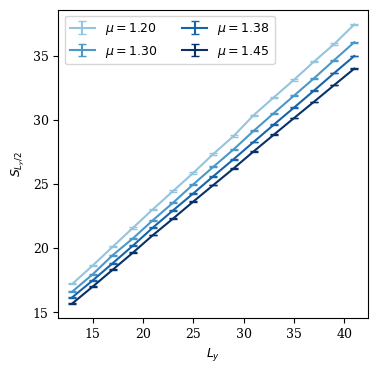

In [155]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
mu_list = df_6.index.get_level_values('mu').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
for mu in mu_list:
    data=df_6['observations'].xs('EE',level='Metrics').xs(nshell,level='nshell').xs(11,level='Lx').xs(0,level='sigma').xs(0,level='seed0').xs(mu,level='mu')
    L_list = data.index 
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(L_list,data_mean,yerr=data_sem,label=f'$\mu={mu:.2f}$',capsize=3,color=next(color_list))
ax.legend(ncols=2,fontsize=9)
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$L_y$')
ax.set_ylabel(r'$S_{L_y/2}$')

Text(0, 0.5, '$C(r)$')

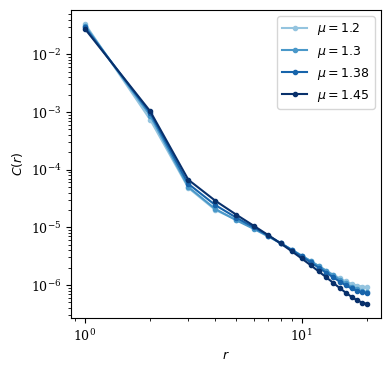

In [156]:
fig,ax=plt.subplots(figsize=(4,4))
mu_list=df_6.index.get_level_values('mu').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
nshell=2
Lx,Ly=11,41
for mu in mu_list[:]:
    data = df_6['observations'].xs('Cr_j',level='Metrics').xs(nshell,level='nshell').xs(Lx,level='Lx').xs(Ly,level='Ly').xs(0,level='sigma').xs(0,level='seed0')[mu]
    x=np.arange(len(data))+1
    ax.plot(x,data,'.-',label=f'$\mu={mu}$',color=next(color_list))
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$r$')
ax.set_ylabel('$C(r)$')

# Generate

In [177]:
L_list=range(11,23,2)
params_list=[
({'es':'50','sigma':0},{'L':L_list,'mu':[1]}),
]
# [1.8,1.9,2,2.1,2.2]
for fixed_params,vary_params in params_list:
    data_6_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_Lx{L}_Ly{L}_nshell{(L-1)//2}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='{L} {L} {mu:.2f} {(L-1)//2} {sigma:.3f}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )



generate_params: 100%|██████████| 6/6 [00:00<00:00, 15669.88it/s]


## Load

In [191]:
L_list=range(11,23,2)
params_list=[
({'es':'50','sigma':0},{'L':L_list,'mu':[1,1.8,1.9,2,2.1,2.2]}),
]
# [1.8,1.9,2,2.1,2.2]
data_all_dict={'fn':set(),}

for fixed_params,vary_params in params_list:
    data_6_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_Lx{L}_Ly{L}_nshell{(L-1)//2}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='{L} {L} {mu:.2f} {(L-1)//2} {sigma:.3f}',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_all_dict,
        data_dict_file=None, 
    )

df_all=convert_pd(data_all_dict,names=['Metrics','Lx','Ly','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 36/36 [00:00<00:00, 67.77it/s]


In [192]:
df_all

,,,,,,,observations
Metrics,Lx,Ly,nshell,mu,sigma,seed0,
Chern_ave,11,11,5,1.0,0.0,0,-0.9208671809445115
TMI,11,11,5,1.0,0.0,0,"[-0.20945486804079907, -0.20755600995333148, -..."
EE,11,11,5,1.0,0.0,0,"[17.012037955079055, 17.05533667823178, 17.055..."
Cr_j,11,11,5,1.0,0.0,0,"[0.03435458776564494, 0.00042723464042620726, ..."
Chern,11,11,5,1.0,0.0,0,"[-0.9194921300057415, -0.9215992127911484, -0...."
...,...,...,...,...,...,...,...
Cr_i,21,21,10,2.2,0.0,0,"[0.013643902774973456, 0.0006884803641895225, ..."
cr_i,21,21,10,2.2,0.0,0,"[-2.7827667600566977e-10, 8.493341544340307e-1..."
eigvals_t,21,21,10,2.2,0.0,0,"[-1.000000013250809, -1.0000000132491687, -1.0..."


Text(0, 0.5, '$C(r)$')

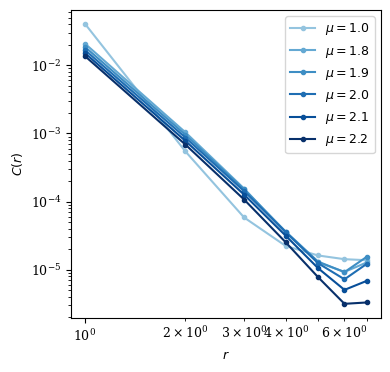

In [301]:
fig,ax=plt.subplots(figsize=(4,4))
mu_list=df_all.index.get_level_values('mu').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
Lx,Ly=15,15
nshell=(Lx-1)//2
for mu in mu_list[:]:
    try:
        data = df_all['observations'].xs('Cr_i',level='Metrics').xs(nshell,level='nshell').xs(Lx,level='Lx').xs(Ly,level='Ly').xs(0,level='sigma').xs(0,level='seed0')[mu]
        x=np.arange(len(data))
        ax.plot(x+1,(data),'.-',label=f'$\mu={mu}$',color=next(color_list))
    except:
        pass
ax.legend()
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel('$r$')
ax.set_ylabel('$C(r)$')

In [223]:
df_all['observations'].xs('EE',level='Metrics').xs(0,level='sigma').xs(0,level='seed0').xs(1,level='mu')

Lx  Ly  nshell
11  11  5         [17.012037955079055, 17.05533667823178, 17.055...
13  13  6         [20.007603866533177, 20.036286577689612, 20.03...
15  15  7         [22.999930340113583, 23.38675688031853, 23.645...
17  17  8         [26.171496931056268, 26.642400312008892, 26.65...
Name: observations, dtype: object

Text(0, 0.5, '$S_{L_y/2}$')

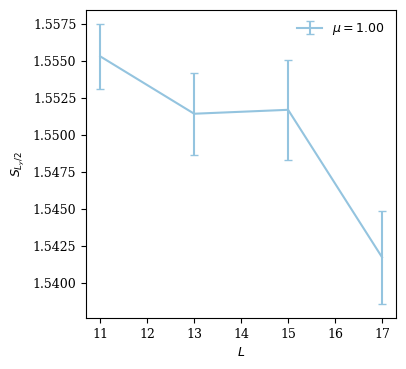

In [234]:
fig,ax=plt.subplots(figsize=(4,4))
# Lx,Ly=11,11
nshell=2
mu_list = df_all.index.get_level_values('mu').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
# for mu in mu_list[3:4]:
for mu in mu_list[:1]:
    data=df_all['observations'].xs('EE',level='Metrics').xs(0,level='sigma').xs(0,level='seed0').xs(mu,level='mu')
    L_list = data.index.get_level_values('Lx')
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(L_list,data_mean/L_list,yerr=data_sem/L_list,label=f'$\mu={mu:.2f}$',capsize=3,color=next(color_list))
ax.legend(ncols=2,fontsize=9,frameon=False)
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$L$')
ax.set_ylabel(r'$S_{L_y/2}$')

In [318]:
L_list=range(11,41,2)
params_list=[
({'es':'50','sigma':0,'Lx':11},{'L':L_list,'mu':[1,1.8,1.9,2,2.1,2.2,3,]}),
]
for fixed_params,vary_params in params_list:
    data_6_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_Lx{Lx}_Ly{L}_nshell{(Lx-1)//2}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='{Lx} {L} {mu:.2f} {(Lx-1)//2} {sigma:.3f}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )



generate_params: 100%|██████████| 15/15 [00:00<00:00, 16504.34it/s]


In [319]:
L_list=range(11,41,2)
params_list=[
({'es':'50','sigma':0,'Lx':11},{'L':L_list,'mu':[1,1.8,1.9,2,2.1,2.2,3]}),
]
# [1.8,1.9,2,2.1,2.2]
data_all2_dict={'fn':set(),}

for fixed_params,vary_params in params_list:
    data_6_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_Lx{Lx}_Ly{L}_nshell{(Lx-1)//2}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_all2_dict,
        data_dict_file=None, 
    )

df_all2=convert_pd(data_all2_dict,names=['Metrics','Lx','Ly','nshell','mu','sigma','seed0'])

generate_params: 100%|██████████| 105/105 [00:02<00:00, 39.47it/s]


In [320]:
df_all2

,,,,,,,observations
Metrics,Lx,Ly,nshell,mu,sigma,seed0,
Chern_ave,11,11,5,1.0,0.0,0,-0.9208671809445115
TMI,11,11,5,1.0,0.0,0,"[-0.20945486804079907, -0.20755600995333148, -..."
EE,11,11,5,1.0,0.0,0,"[17.012037955079055, 17.05533667823178, 17.055..."
Cr_j,11,11,5,1.0,0.0,0,"[0.03435458776564494, 0.00042723464042620726, ..."
Chern,11,11,5,1.0,0.0,0,"[-0.9194921300057415, -0.9215992127911484, -0...."
...,...,...,...,...,...,...,...
Cr_i,11,33,5,3.0,0.0,0,"[0.0071238851395971714, 0.00023382742914260734..."
cr_i,11,33,5,3.0,0.0,0,"[3.6629767300686215e-10, 9.874050420156273e-11..."
eigvals_t,11,33,5,3.0,0.0,0,"[-1.0000001183011098, -1.0000000042739847, -1...."


Text(0, 0.5, '$C(r)$')

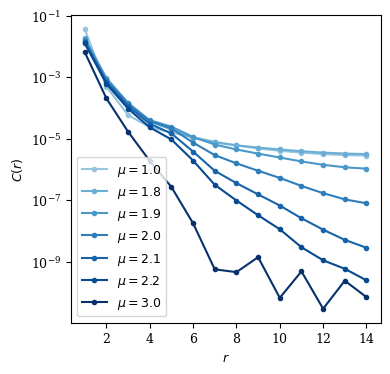

In [327]:
fig,ax=plt.subplots(figsize=(4,4))
mu_list=df_all2.index.get_level_values('mu').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
Lx,Ly=11,29
nshell=5
for mu in mu_list:
    try:
        data = df_all2['observations'].xs('Cr_j',level='Metrics').xs(5,level='nshell').xs(0,level='sigma').xs(0,level='seed0').xs(Lx,level='Lx').xs(Ly,level='Ly')[mu]
        x=np.arange(len(data))
        ax.plot(x+1,np.abs(data),'.-',label=f'$\mu={mu}$',color=next(color_list))
    except:
        pass
ax.legend()
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel('$r$')
ax.set_ylabel('$C(r)$')

Text(0, 0.5, '$S_{L_y/2}$')

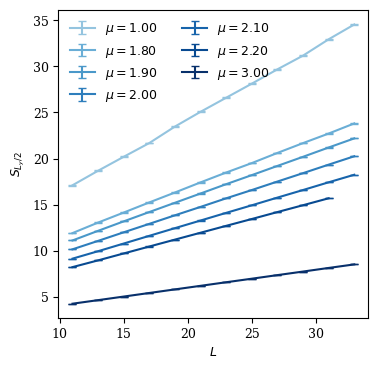

In [328]:
fig,ax=plt.subplots(figsize=(4,4))
# Lx,Ly=11,11
# nshell=2
mu_list = df_all2.index.get_level_values('mu').unique()
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
# for mu in mu_list[3:4]:
for mu in mu_list[:]:
    data=df_all2['observations'].xs('EE',level='Metrics').xs(0,level='sigma').xs(0,level='seed0').xs(mu,level='mu')
    L_list = data.index.get_level_values('Ly')
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(L_list,data_mean,yerr=data_sem,label=f'$\mu={mu:.2f}$',capsize=3,color=next(color_list))
ax.legend(ncols=2,fontsize=9,frameon=False)
# ax.set_xlim([0.,0.45])
# ax.set_ylim([-0.8,-0.45])

ax.set_xlabel('$L$')
ax.set_ylabel(r'$S_{L_y/2}$')

In [ ]:
L_list=range(11,17,2)
params_list=[
({'es':'50','sigma':0,'Ly':33},{'Lx':L_list,'mu':[1,2,3,]}),
]
for fixed_params,vary_params in params_list:
    data_6_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_Lx{Lx}_Ly{L}_nshell{(Lx-1)//2}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_EE.pt',
        fn_dir_template='.',
        input_params_template='{Lx} {L} {mu:.2f} {(Lx-1)//2} {sigma:.3f}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )

